# Simulador de clima

## Parámetros iniciales (a definir o modificar por el usuario)

- Temperatura inicial (en grados Celsius)
- Probabilidad de lluvia (en porcentaje)

In [31]:
temperatura_inicial = 20
probabilidad_lluvia = 0.1 # 0 <= probabilidad_lluvia <= 1


## Reglas

En cada día que pasa tenemos que

- 10% de probabilidad de que la temperatura aumente o disminuya en 2 grados
- Si la temperatura supera los 25 grados, la probabilidad de lluvia aumenta en
  20%
- Si la temperatura es menor a 5 grados, la probabilidad de lluvia disminuye en
  20%
- Si llueve, la temperatura disminuye en 1 grado

## Función

La función recibe:

- Número de días a simular

Y devuelve (muestra):

- Temperatura de cada día
- Si llovió o no
- Probabilidad de lluvia de cada día
- Número de días que llovió

### Algunas librerías útiles

In [32]:
import matplotlib.pyplot as plt
import random as rnd
from scipy import interpolate
import numpy as np
import pandas as pd
import seaborn as sns


In [33]:
def suavizador(x, y, kind='linear'):
  f = interpolate.interp1d(x, y, kind=kind)
  xnew = np.linspace(min(x), max(x), 100)
  ynew = f(xnew)
  return xnew, ynew


### Función principal (simulación)

In [34]:
def simulador(numero_dias=30, verbose=False, min_prob=0):

  temperatura_actual = temperatura_inicial
  temperaturas = [temperatura_actual]
  dias = [0]
  lluvias = [0] * numero_dias
  probabilidad_actual = probabilidad_lluvia
  probabilidades = [probabilidad_actual]

  for dia in range(1, numero_dias):
    random = rnd.random()
    # 10% de probabilidad de que la temperatura aumente
    # o disminuya en 2 grados
    if random < 0.1:
      delta = rnd.choice([-2, 2])
      temperatura_actual += delta
      if verbose:
        print(f'El día {dia} la temperatura cambió en {delta} grados')

    # Lluvia
    random_lluvia = rnd.random()
    if random_lluvia < probabilidad_actual:
      temperatura_actual -= 1
      lluvias[dia] = 1
      if verbose:
        print(f'El día {dia} llovió')

    # Si temperatura actual > 25
    if temperatura_actual > 25:
      probabilidad_actual = min(1, probabilidad_actual + 0.2)
      if verbose:
        print(f'El día {dia} la probabilidad de lluvia aumentó a {probabilidad_actual}')

    # Si temperatura actual < 5
    if temperatura_actual < 5:
      probabilidad_actual = max(0, probabilidad_actual - 0.2)
      if verbose:
        print(f'El día {dia} la probabilidad de lluvia disminuyó a {probabilidad_actual}')

    temperaturas.append(temperatura_actual)
    dias.append(dia)
    probabilidades.append(probabilidad_actual)

  return dias, temperaturas, lluvias, probabilidades


### Resultados

El día 1 llovió
El día 8 la temperatura cambió en 2 grados
El día 8 llovió
El día 11 llovió
El día 16 llovió
El día 24 la temperatura cambió en -2 grados


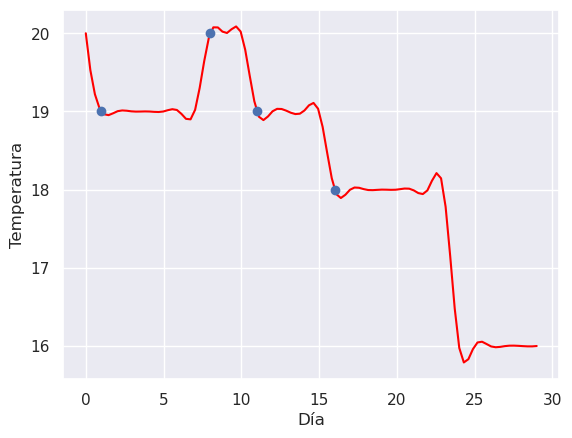

In [35]:
sns.set_theme(style="darkgrid")

dias, temperaturas, lluvias, probabilidades = simulador(verbose=True)

xnew, ynew = suavizador(dias, temperaturas, kind='cubic')
data = {'Día': xnew, 'Temperatura': ynew}
df = pd.DataFrame(data)
sns.lineplot(data=df, x='Día', y='Temperatura', color='red')


# data = {'Día': dias, 'Temperatura': temperaturas, 'Lluvia': lluvias, 'Probabilidad': probabilidades}
# df = pd.DataFrame(data)
# sns.lineplot(data=df, x='Día', y='Temperatura', color='red')

# Marcar los días de lluvia
for dia, lluvia in enumerate(lluvias):
  if lluvia:
    plt.plot(dia, temperaturas[dia], 'bo')


### Estadísticas

In [36]:
dias_lluvia = sum(lluvias)
max_temperatura = max(temperaturas)
min_temperatura = min(temperaturas)

print(f'Hubo {dias_lluvia} días de lluvia')
print(f'La temperatura máxima fue {max_temperatura} grados')
print(f'La temperatura mínima fue {min_temperatura} grados')


Hubo 4 días de lluvia
La temperatura máxima fue 20 grados
La temperatura mínima fue 16 grados


### Referencias

- [Seaborn Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

- [Scipy
  Interpolate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)